In [1]:
import os
import cv2
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from keras.layers import Input ,Dense ,Flatten, Lambda 
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
from tensorflow.keras.optimizers import Adam

In [2]:
IMAGE_SIZE = [224,224]

train_path = r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\train'
test_path = r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\test'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
for layer in vgg.layers:
    layer.trainable = False

In [5]:
folders = glob( r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\train')
f = Flatten()(vgg.input)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
training_set = train_datagen.flow_from_directory(r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\train',
                                                    target_size = (224, 224), batch_size = 10,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [9]:
test_set = test_datagen.flow_from_directory(r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [10]:
folders = glob(r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\train')
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
training_set = train_datagen.flow_from_directory(r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\train',
                                                    target_size = (224, 224), batch_size = 10,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory(r'C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\test',
                                            target_size = (224, 224),
                                            batch_size = 10,
                                            class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [16]:
r = model.fit( training_set,
  validation_data=test_set,
  epochs=2,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/2
522/522 [==============================] - 15881s 30s/step - loss: 0.1691 - accuracy: 0.7429 - val_loss: 0.3741 - val_accuracy: 0.6250
Epoch 2/2
522/522 [==============================] - 8602s 17s/step - loss: 0.1185 - accuracy: 0.7429 - val_loss: 0.6730 - val_accuracy: 0.6250


In [17]:
import tensorflow as tf
from keras.models import load_model

model.save('chest_xray.h5')

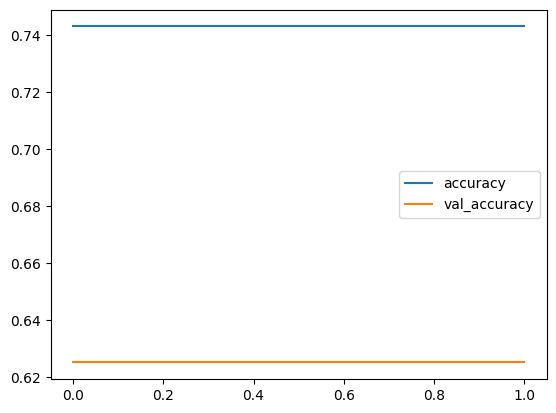

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

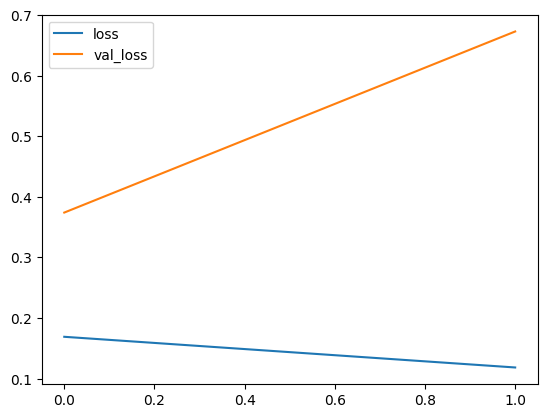

In [19]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [20]:
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import keras.utils as image

In [21]:
model=load_model('chest_xray.h5')

In [22]:
img = image.load_img(r"C:\Users\kushp\OneDrive\Desktop\7th sem project\project_dataset\val\PNEUMONIA\person1947_bacteria_4876.jpeg",target_size=(224,224))

In [23]:
x=image.img_to_array(img)

In [24]:
x=np.expand_dims(x, axis=0)

In [25]:
img_data=preprocess_input(x)

In [26]:
img_data = preprocess_input(x)

In [27]:
classes = model.predict(img_data)

1/1 [==============================] - 1s 646ms/step


In [28]:
result=int(classes[0][0])

In [29]:
classes

array([[1.]], dtype=float32)

In [30]:
if result>0.5:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")

Person is Affected By PNEUMONIA
